# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
# ================================================================
# 2. IMPORT LIBRARY
# ================================================================

# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing
import re
import string

# NLP tools (opsional kalau ingin analisis kata)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Menampilkan progress & konfigurasi tampilan
import warnings
warnings.filterwarnings('ignore')

print("✅ Semua library berhasil diimpor.")


✅ Semua library berhasil diimpor.


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [13]:
# ================================================================
# 3. MEMUAT DATASET (FIX)
# ================================================================

# Install jika belum (hanya sekali)
# !pip install kagglehub[pandas-datasets]

import kagglehub
import pandas as pd
import os

# ================================================================
# 1️⃣ Download dataset
# ================================================================
path = kagglehub.dataset_download("alvinhanafie/dataset-for-indonesian-sentiment-analysis")
print("📁 Path ke folder dataset:", path)

# ================================================================
# 2️⃣ Cek file di folder
# ================================================================
print("📄 File yang tersedia:")
print(os.listdir(path))

# ================================================================
# 3️⃣ Baca file TSV utama (bukan CSV)
# ================================================================
file_path = os.path.join(path, "train_preprocess_ori.tsv")
df = pd.read_csv(file_path, sep="\t")   # sep="\t" karena format TSV (tab-separated)

# ================================================================
# 4️⃣ Tampilkan informasi dasar dataset
# ================================================================
print("✅ Dataset berhasil dimuat!")
print("Jumlah data:", len(df))
print("\nKolom yang tersedia:", df.columns.tolist())
print("\n5 baris pertama:")
display(df.head())

# Opsional: lihat distribusi label
if 'label' in df.columns:
    print("\nDistribusi Label:")
    print(df['label'].value_counts())
else:
    print("\nKolom 'label' tidak ditemukan. Kolom yang ada:", df.columns)

Using Colab cache for faster access to the 'dataset-for-indonesian-sentiment-analysis' dataset.
📁 Path ke folder dataset: /kaggle/input/dataset-for-indonesian-sentiment-analysis
📄 File yang tersedia:
['train_preprocess_ori.tsv', 'valid_preprocess.tsv', 'test_preprocess_masked_label.tsv']
✅ Dataset berhasil dimuat!
Jumlah data: 11000

Kolom yang tersedia: ['text', 'sentiment']

5 baris pertama:


,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative



Kolom 'label' tidak ditemukan. Kolom yang ada: Index(['text', 'sentiment'], dtype='object')


In [14]:
# ================================================================
# Cek distribusi sentimen
# ================================================================
label_col = 'sentiment' if 'sentiment' in df.columns else 'label'
print("\nDistribusi Sentimen:")
print(df[label_col].value_counts())



Distribusi Sentimen:
sentiment
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       11000 non-null  object
 1   sentiment  11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB
None

Statistik dasar (panjang teks):
count    11000.000000
mean       188.896909
std        121.082093
min          3.000000
25%         89.000000
50%        160.000000
75%        276.000000
max        567.000000
Name: text_length, dtype: float64


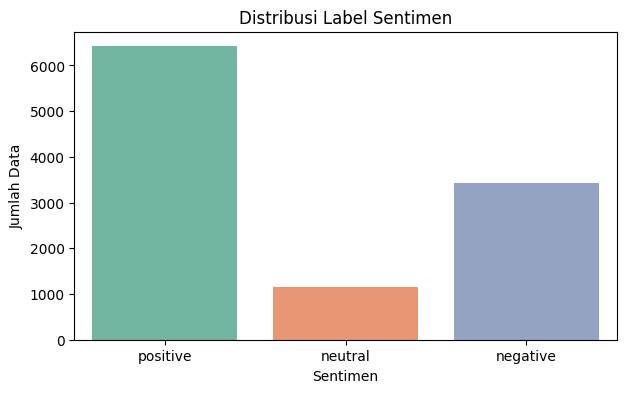

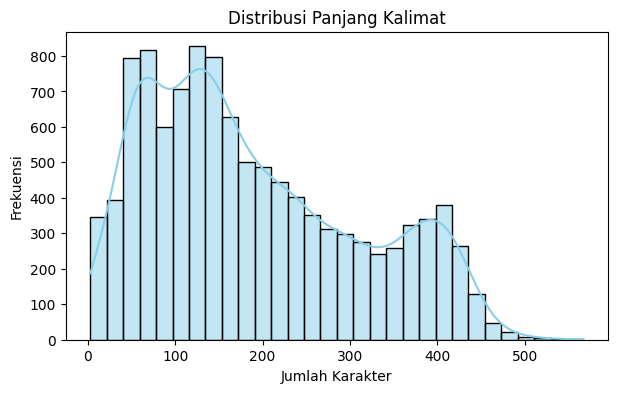

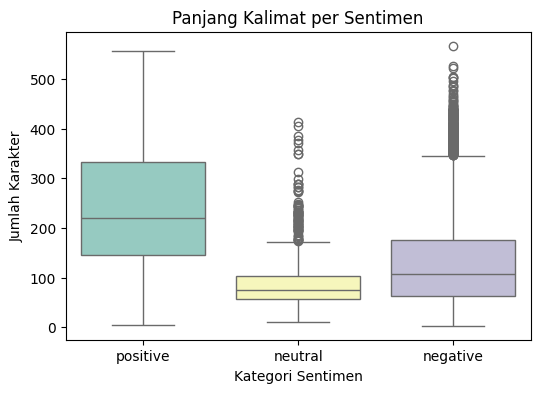


🟢 Contoh teks sentimen 'positive':
- resto makanan barat dengan harga kaki lima , ditambah pemandangan alam yang indah , suasana yang romantis , asal jangan hujan , karena di teras dibiar ...
- makmur ...

🟢 Contoh teks sentimen 'neutral':
- pan yakin bahwa hasil pilkada akan berpengaruh ke pilpres . ...
- eci bukan bangsa indonesia ; eci adalah musuh pribumi dan muslim . ...

🟢 Contoh teks sentimen 'negative':
- kita akhir pekan ke sana . sesak dan antre . beli voucher makan dulu . dari beberapa makanan yang kita coba , mahal dan tidak ada yang enak . habis it ...
- oh pantesan dipecat dari menteri . sudah ada kjp kok ngapain kip . mengajarkan rakyat jadi rakus ini anies . ...


In [15]:
# ================================================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ================================================================
# Cek informasi dasar dataset
# ================================================================
print("Informasi Dataset:")
print(df.info())

print("\nStatistik dasar (panjang teks):")
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())

# ================================================================
# Visualisasi distribusi label sentimen
# ================================================================
plt.figure(figsize=(7,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Distribusi Label Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.show()

# ================================================================
# Analisis panjang teks
# ================================================================
plt.figure(figsize=(7,4))
sns.histplot(df['text_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Panjang Kalimat')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.show()

# ================================================================
# Jumlah karakter rata-rata per sentimen
# ================================================================
plt.figure(figsize=(6,4))
sns.boxplot(x='sentiment', y='text_length', data=df, palette='Set3')
plt.title('Panjang Kalimat per Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Karakter')
plt.show()

# ================================================================
# Tampilkan beberapa contoh teks tiap kategori
# ================================================================
for s in df['sentiment'].unique():
    print(f"\n🟢 Contoh teks sentimen '{s}':")
    sample = df[df['sentiment']==s]['text'].sample(2, random_state=42).values
    for t in sample:
        print("-", t[:150], "...")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [17]:
# ================================================================
# 5. DATA PREPROCESSING (Versi Aman & Lengkap)
# ================================================================

import pandas as pd
import re
import os

# Pastikan dataset sudah ada di variabel df
print("Jumlah data awal:", len(df))

# ================================================================
# 1️⃣ Hapus missing values & duplikasi
# ================================================================
df = df.dropna(subset=['text', 'sentiment'])        # hapus baris kosong
df = df.drop_duplicates(subset=['text'])            # hapus teks duplikat
print("Jumlah data setelah dibersihkan:", len(df))

# ================================================================
# 2️⃣ Fungsi pembersihan teks dasar
# ================================================================
def clean_text(text):
    # ubah ke huruf kecil
    text = text.lower()
    # hapus URL
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # hapus mention dan hashtag
    text = re.sub(r"@\w+|#\w+", '', text)
    # hapus angka dan simbol
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    # rapikan spasi berlebih
    text = re.sub(r"\s+", ' ', text).strip()
    return text

# Terapkan fungsi pembersihan
df['clean_text'] = df['text'].apply(clean_text)

# ================================================================
# 3️⃣ Hapus stopwords Bahasa Indonesia (jika tersedia)
# ================================================================
try:
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('indonesian'))

    def remove_stopwords(text):
        return ' '.join([word for word in text.split() if word not in stop_words])

    df['clean_text'] = df['clean_text'].apply(remove_stopwords)
    print("Stopwords berhasil dihapus.")
except Exception as e:
    print("⚠️ Stopwords tidak dihapus karena modul belum tersedia:", e)

# ================================================================
# 4️⃣ Cek contoh hasil preprocessing
# ================================================================
print("\nContoh hasil pembersihan teks:")
print(df[['text', 'clean_text', 'sentiment']].sample(3, random_state=42))

# ================================================================
# 5️⃣ Simpan hasil preprocessing
# ================================================================
os.makedirs('preprocessing', exist_ok=True)  # buat folder jika belum ada
output_path = 'preprocessing/namadataset_preprocessing.csv'
df.to_csv(output_path, index=False, encoding='utf-8')
print(f"\n💾 Dataset hasil preprocessing disimpan di: {output_path}")

# ================================================================
# 6️⃣ Info akhir
# ================================================================
print("\nJumlah data akhir:", len(df))
print("Kolom tersedia:", list(df.columns))

Jumlah data awal: 10933
Jumlah data setelah dibersihkan: 10933
Stopwords berhasil dihapus.

Contoh hasil pembersihan teks:
                                                   text  \
533                       ikan laut di aceh masih mahal   
3891  pizza sama coffie nya enak , harga nya juga mu...   
932   kalau mau merasakan roti zaman dahulu , ini sa...   

                                             clean_text sentiment  
533                                ikan laut aceh mahal  negative  
3891  pizza coffie nya enak harga nya murah banget h...  positive  
932   merasakan roti zaman salah nya buka nya sore p...  positive  

💾 Dataset hasil preprocessing disimpan di: preprocessing/namadataset_preprocessing.csv

Jumlah data akhir: 10933
Kolom tersedia: ['text', 'sentiment', 'text_length', 'clean_text']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
%%writefile automate_EkaFanya.py
# ================================================================
# automate_EkaFanya.py
# Author: Eka Fanya Yohana Dasilva
# Deskripsi: Otomatisasi preprocessing dataset sentimen Bahasa Indonesia
# ================================================================

import pandas as pd
import re
import os
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = [word for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

def preprocess_dataset(input_path, output_path):
    df = pd.read_csv(input_path, sep='\t')
    print(f"📥 Data awal: {len(df)} baris")

    df = df.drop_duplicates(subset='text')
    print(f"🧹 Setelah hapus duplikat: {len(df)} baris")

    df = df.dropna(subset=['text', 'sentiment'])
    df['clean_text'] = df['text'].apply(clean_text)

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    df.to_csv(output_path, index=False)
    print(f"💾 Dataset hasil preprocessing disimpan di: {output_path}")
    print("\n✅ Preprocessing selesai!")
    print(df.head())

if __name__ == "__main__":
    input_path = "namadataset_raw/dataset-for-indonesian-sentiment-analysis/train_preprocess_ori.tsv"
    output_path = "preprocessing/namadataset_preprocessing.csv"
    preprocess_dataset(input_path, output_path)

Writing automate_EkaFanya.py
